In [40]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import warnings
import numpy as np
from numpy import log, exp, sqrt, pi, e

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd

import seaborn as sns
sns.set_style('darkgrid')
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [42]:
np.random.seed(4)

n = 50
m = 3
b = 2

e_std = 0.5
err = e_std * np.random.randn(n)

x = np.random.uniform(0, 1, n)
y = x * m + b + err

X = np.vstack((np.ones_like(x), x)).T

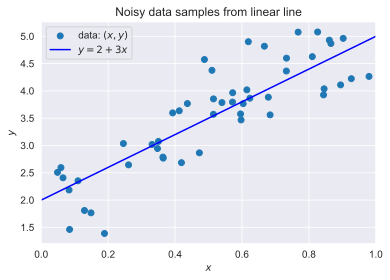

In [43]:
plt.figure(figsize = (6, 4))
plt.scatter(x, y, label = 'data: $(x, y)$')
plt.plot([0, 1], [b, m + b], 'b-', label = f'$y = {b:.0f} + {m:.0f} x$')
plt.xlim((0, 1))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Noisy data samples from linear line')
plt.legend()
plt.show()

In [44]:
pd.DataFrame(X)

,0,1
0,1.0,0.331175
1,1.0,0.572139
2,1.0,0.845444
3,1.0,0.861014
4,1.0,0.595688
5,1.0,0.084662
6,1.0,0.597267
7,1.0,0.245454
8,1.0,0.732593
9,1.0,0.894651


## Simple linear regression

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)

theta_1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()
theta_0 = y_mean - theta_1 * x_mean

f = lambda x: theta_0 + theta_1 * x

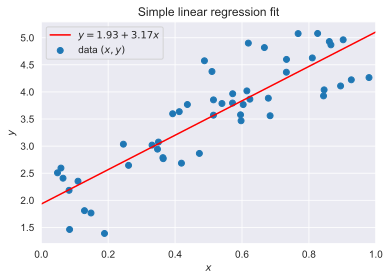

In [18]:
plt.figure(figsize = (6, 4))
plt.plot([0, 1], [f(0), f(1)], 'r-', label = f'$y = {theta_0:.2f} + {theta_1:.2f} x$')
plt.scatter(x, y, label = 'data $(x,y)$')
plt.legend()
plt.title('Simple linear regression fit')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim((0, 1))
plt.show()

## Ordinary least squares regression

In [45]:
X.shape

(50, 2)

In [46]:
y.shape

(50,)

In [47]:
(np.linalg.inv(X @ X.T) @ X).shape

(50, 2)

In [53]:
Theta = np.linalg.inv(X.T @ X) @ X.T @ y
f = lambda x:Theta[0] + Theta[1] * x

In [54]:
Theta

array([1.93165566, 3.17428625])

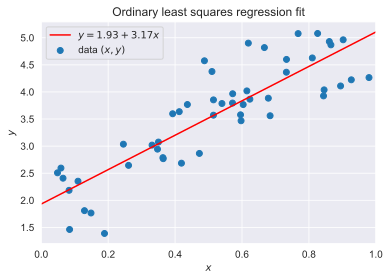

In [49]:
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [f(0), f(1)], 'r-', label=f'$y = {Theta[0]:.2f} + {Theta[1]:.2f} x$')
plt.scatter(x, y, label='data $(x,y)$')
plt.legend()
plt.title('Ordinary least squares regression fit')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim((0, 1))
plt.show()

## Gradient descent optimization

In [81]:
def update(Theta, X, y, learning_rate):
    grad = -2 * X.T @ (y - (X @ Theta))
    Theta -= grad * learning_rate
    return Theta

In [82]:
np.random.seed(13)
Theta = np.random.randn(2)
learning_rate = 0.01
losses = []
params = []

for i in range(50):
    Theta = update(Theta, X, y, learning_rate)
    losses.append(np.mean((y - X @ Theta) ** 2))
    params.append(Theta.copy())

f = lambda x: Theta[0] + Theta[1] * x

In [112]:
np.vstack(params)

array([[3.17568467, 2.92098006],
       [2.06184267, 2.36619841],
       [2.34697335, 2.56913969],
       [2.24267144, 2.55776797],
       [2.24851595, 2.60379978],
       [2.22485785, 2.63145604],
       [2.21064388, 2.66203595],
       [2.1949273 , 2.68970935],
       [2.18070453, 2.71621911],
       [2.1670798 , 2.74118607],
       [2.154248  , 2.76481807],
       [2.14210231, 2.78715336],
       [2.13062306, 2.80827235],
       [2.11976893, 2.82823869],
       [2.10950721, 2.84711601],
       [2.09980519, 2.8649635 ],
       [2.09063245, 2.8818374 ],
       [2.08196009, 2.89779081],
       [2.07376082, 2.91287394],
       [2.06600882, 2.92713428],
       [2.05867971, 2.94061669],
       [2.05175041, 2.95336363],
       [2.0451991 , 2.9654152 ],
       [2.03900518, 2.97680935],
       [2.03314915, 2.98758193],
       [2.02761256, 2.99776686],
       [2.02237801, 3.00739619],
       [2.017429  , 3.01650023],
       [2.01274997, 3.02510763],
       [2.00832619, 3.03324549],
       [2.

In [95]:
X.shape

(50, 2)

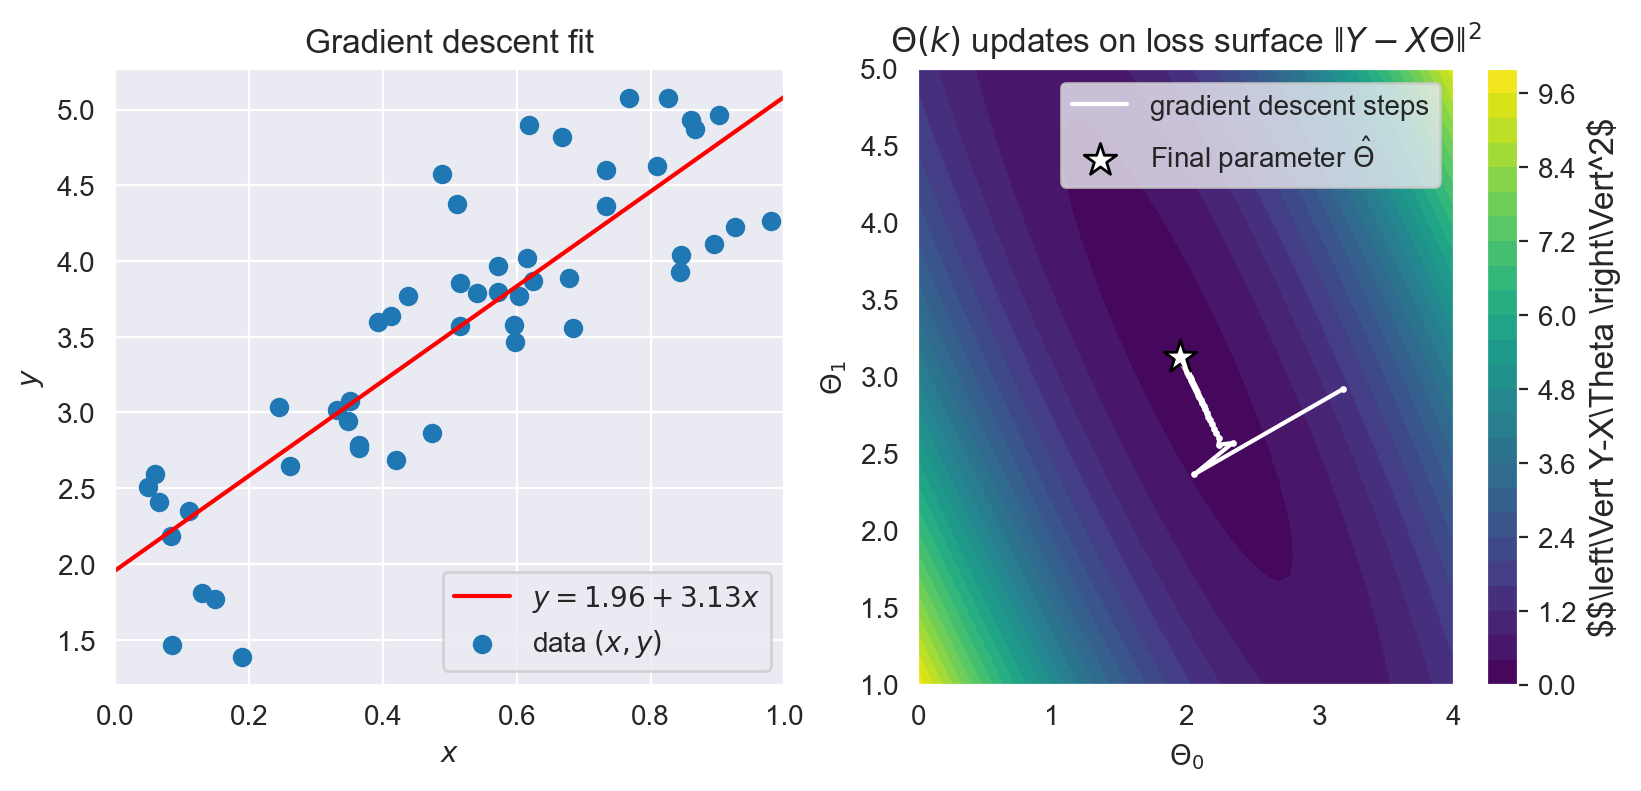

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9.5, 4))
ax1.plot([0, 1], [f(0), f(1)], 'r-', label = f'$y = {Theta[0]:.2f} + {Theta[1]:.2f} x$')
ax1.scatter(x, y, label = 'data $(x, y)$')
ax1.legend()
ax1.set_title('Gradient descent fit')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_xlim((0, 1))

nb_of_ws = 50
wsa = np.linspace(0, 4, num = nb_of_ws)
wsb = np.linspace(1, 5, num = nb_of_ws)
ws_x, ws_y = np.meshgrid(wsa, wsb)
loss_ws = np.zeros((nb_of_ws, nb_of_ws))
# ws_x[0, 0], ws_y[0, 0]

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        theta = np.asarray([ws_x[i, j], ws_y[i, j]])
        loss_ws[i, j] = np.mean((y - X @ theta) ** 2)

cont = ax2.contourf(ws_x, ws_y, loss_ws, 30, cmap = cm.viridis)
theta_prev = None
has_label = False
params_arr = np.vstack(params)

ax2.scatter(params_arr[:, 0], params_arr[:, 1], color = 'w', s = 2)
ax2.plot(params_arr[:, 0], params_arr[:, 1], 'w-', label = 'gradient descent steps')
ax2.scatter([Theta[0]], [Theta[1]], label = 'Final parameter $\\hat{\\Theta}$',
            color = 'w', marker = '*', s = 150, edgecolors = 'k')
cbar = plt.colorbar(cont)
cbar.set_label('X + Y')
cbar.ax.set_ylabel('$$\left\\Vert Y-X\\Theta \\right\\Vert^2$', fontsize = 12)
ax2.set_title(('$\\Theta(k)$ updates on loss surface '
               '$\\left\\Vert Y-X\\Theta \\right\\Vert^2$'))
ax2.set_xlabel('$\\Theta_0$')
ax2.set_ylabel('$\\Theta_1$')
ax2.legend()
plt.show()

In [67]:
sqrt(np.mean((y - X @ Theta) ** 2))

0.4908105747538271

In [69]:
np.linalg.norm(y - X @ Theta) / sqrt(50)

0.4908105747538271

## Markov Chain Monte Carlo parameter estimation

In [122]:
def metropolis_hastings_step(y, x, theta_0, theta_1, sigma):
    while True:
        theta_0_p = theta_0 + np.random.randn(1) * 0.1
        theta_1_p = theta_1 + np.random.randn(1) * 0.1
        sigma_p = sigma + np.random.randn(1) * 0.1
        log_ratio = log_likelihood(y, x, theta_0_p, theta_1_p, sigma_p) - log_likelihood(y, x, theta_0, theta_1, sigma)
        if log_ratio >= 0: #e
            return theta_0_p, theta_1_p, sigma_p
        elif log(np.random.uniform()) < log_ratio:
            return theta_0_p, theta_1_p, sigma_p

def log_likelihood(y, x, theta_0, theta_1, sigma):
    sigma_sq = sigma ** 2
    sse = sum((y - (theta_0 + theta_1 * x)) ** 2)
    return - len(y) * log(sqrt(2 * pi * sigma_sq)) - (sse/(2 * sigma_sq))

In [139]:
np.random.seed(1)

theta_0 = 1.
theta_1 = 1.
sigma = 1.

samples = []
for _ in range(20000):
    theta_0, theta_1, sigma = metropolis_hastings_step(y, x, theta_0, theta_1, sigma)
    samples.append((theta_0, theta_1, sigma))

th_0_samples, th_1_samples, sigma_samples = zip(*samples)
theta_0 = np.mean(th_0_samples[1000:])
theta_1 = np.mean(th_1_samples[1000:])

f = lambda x: theta_0 + theta_1 * x

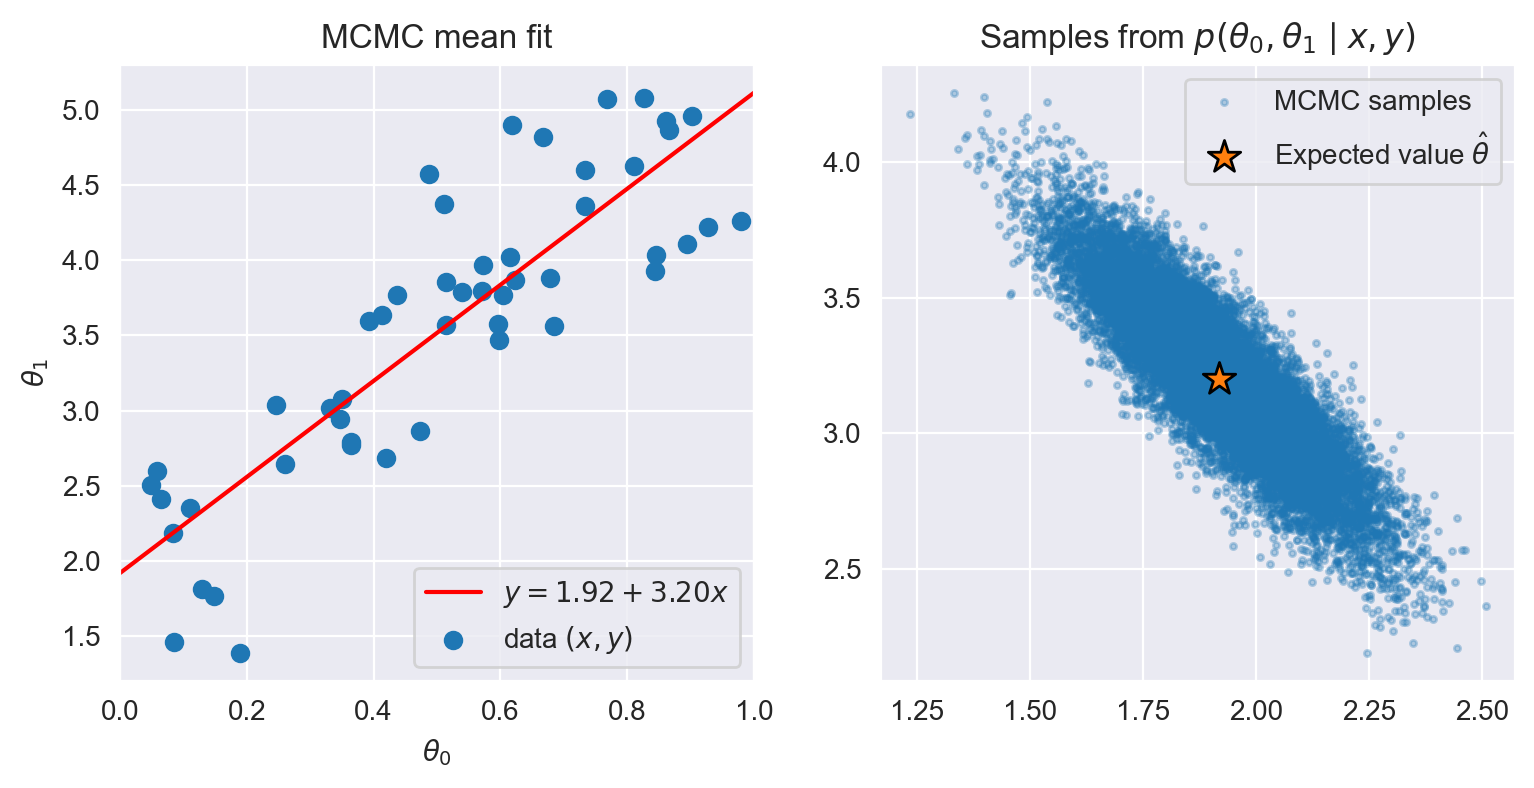

In [126]:
%config InlineBackend.figure_formats = ['retina']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 4), dpi = 100)
ax1.plot([0, 1], [f(0), f(1)], 'r-', label = f'$y = {theta_0:.2f} + {theta_1:.2f} x$')
ax1.scatter(x, y, label = 'data $(x, y)$')
ax1.legend()
ax1.set_title('MCMC mean fit')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim((0, 1))

ax2.scatter(th_0_samples[1000:], th_1_samples[1000:], alpha = 0.3, s = 5, label = 'MCMC samples')
ax2.scatter([theta_0], [theta_1], label = 'Expected value $\\hat{\\theta}$', s = 150, marker = '*', edgecolors = 'k')
ax2.set_title('Samples from $p(\\theta_0, \\theta_1 \\mid x, y)$')
ax1.set_xlabel('$\\theta_0$')
ax1.set_ylabel('$\\theta_1$')
ax2.legend()
plt.show()

# 